# Description: This program attempts to optimize a users portfolio using the Efficient Frontier & Python.

In [345]:
# Import the python libraries
from pandas_datareader import data as web
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='darkgrid',context='talk',palette='twilight_r')


# Create The Fictional Portfolio
Get the stock symbols / tickers for the fictional portfolio. I am going to use the five most popular and best performing American technology companies known as FAANG, which is an acronym for Facebook, Amazon , Apple, Netflix , & Alphabet (formerly known as Google).

In [346]:
assets =  ["FB","AMZN","AAPL","NFLX","GOOG"]

Next I will assign equivalent weights to each stock within the portfolio, meaning 20% of this portfolio will have shares in Facebook (FB), 20% in Amazon (AMZN), 20% in Apple (AAPL) , 20% in Netflix (NFLX), and 20% in Google (GOOG).
This means if I had a total of 100 USD in the portfolio, then I would have 20 USD in each stock. You can insert any number of stocks in to the list assets it will assign equal weights to the weights of the asset

In [347]:
# Assign weights to the stocks. Weights must = 1 so 0.2 for each
weights = np.full(len(assets),0.9)
weights /= np.sum(weights)
weights

array([0.2, 0.2, 0.2, 0.2, 0.2])

In [348]:
sum(weights) == 1

True

Now I will get the stocks starting date which will be January 1st 2013, 
and the ending date which will be the current date (today).

In [349]:
#Get the stock starting date
stockStartDate = '2013-01-01'
# Get the stocks ending date aka todays date and format it in the form YYYY-MM-DD
today = datetime.today().strftime('%Y-%m-%d')

Time to create the data frame that will hold the stocks Adjusted Close price.

In [350]:
#Create a dataframe to store the adjusted close price of the stocks
df = pd.DataFrame()
#Store the adjusted close price of stock into the data frame
for stock in assets:
    df[stock] = web.DataReader(stock,data_source='yahoo',start=stockStartDate , end=today)['Adj Close']

Show the data frame and the adjusted close price of each stock.
df

In [351]:
df

,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2012-12-31,26.620001,250.869995,66.398476,13.227143,352.369232
2013-01-02,28.000000,257.309998,68.502106,13.144286,360.274597
2013-01-03,27.770000,258.480011,67.637436,13.798572,360.483826
2013-01-04,28.760000,259.149994,65.753418,13.711429,367.607117
2013-01-07,29.420000,268.459991,65.366646,14.171429,366.003143
...,...,...,...,...,...
2020-07-29,233.289993,3033.530029,380.160004,484.480011,1522.020020
2020-07-30,234.500000,3051.879883,384.760010,485.799988,1531.449951
2020-07-31,253.669998,3164.679932,425.040009,488.880005,1482.959961


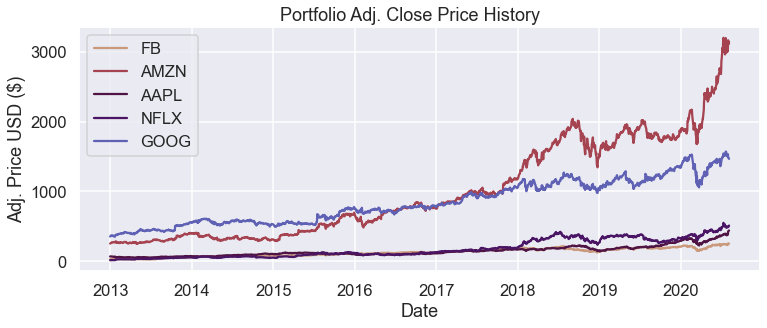

In [352]:
# Create the title 'Portfolio Adj Close Price History
title = 'Portfolio Adj. Close Price History    '
#Get the stocks
my_stocks = df
#Create and plot the graph
plt.figure(figsize=(12.2,4.5)) #width = 12.2in, height = 4.5
# Loop through each stock and plot the Adj Close for each day
for c in my_stocks.columns.values:
  plt.plot( my_stocks[c],  label=c)#plt.plot( X-Axis , Y-Axis, line_width, alpha_for_blending,  label)
plt.title(title)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Adj. Price USD ($)',fontsize=18)
plt.legend(my_stocks.columns.values, loc='upper left')
plt.show()

Financial Calculations
I’m done creating the fictional portfolio. Now I want to show the daily simple returns which is a calculation of the (new_price + -old_price)/ old_price or (new_price / old_price)-1.For this i will use the pandas function pct_change() which Computes the percentage change from the immediately previous row by default. This is useful in comparing the percentage of change in a time series of elements.Notice the NA in the first row of the data frame since there would be no percentage of change with the Adj. close price itself.

In [353]:
#Show the daily simple returns, NOTE: Formula = new_price/old_price - 1
returns = df.pct_change()
returns

,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2012-12-31,NaN,NaN,NaN,NaN,NaN
2013-01-02,0.051841,0.025671,0.031682,-0.006264,0.022435
2013-01-03,-0.008214,0.004547,-0.012623,0.049777,0.000581
2013-01-04,0.035650,0.002592,-0.027855,-0.006315,0.019760
2013-01-07,0.022949,0.035925,-0.005882,0.033549,-0.004363
...,...,...,...,...,...
2020-07-29,0.013775,0.011065,0.019168,-0.008250,0.014450
2020-07-30,0.005187,0.006049,0.012100,0.002725,0.006196
2020-07-31,0.081748,0.036961,0.104689,0.006340,-0.031663


Create and show the annualized co-variance matrix. The co-variance matrix is a mathematical concept which is commonly used in statistics when comparing data samples from different populations and is used to determine how much two random variables vary or move together (so it’s the directional relationship between two asset prices ).
The diagonal of the matrix are the variances and the other entries are the co-variances. Variance is a measure of how much a set of observations differ from each other. If you take the square root of variance you get the volatility also known as the standard deviation.
To show the annualized co-variance matrix we must multiply the co-variance matrix by the number of trading days for the current year.

In [354]:
cov_matrix_annual = returns.cov() * 250
cov_matrix_annual

,FB,AMZN,AAPL,NFLX,GOOG
FB,0.116327,0.052509,0.042111,0.054104,0.048474
AMZN,0.052509,0.092076,0.036395,0.061195,0.046461
AAPL,0.042111,0.036395,0.077368,0.032040,0.036999
NFLX,0.054104,0.061195,0.032040,0.210451,0.048576
GOOG,0.048474,0.046461,0.036999,0.048576,0.064579


Now calculate and show the portfolio variance using the formula :
Expected portfolio variance= WT * (Covariance Matrix) * W

In [355]:
port_variance = np.dot(weights.T, np.dot(cov_matrix_annual, weights))
port_variance

0.05914109002721678

Now calculate and show the portfolio volatility using the formula :
Expected portfolio volatility= SQRT (WT * (Covariance Matrix) * W)
Don’t forget the volatility (standard deviation) is just the square root of the variance.

In [356]:
port_volatility = np.sqrt(port_variance)
port_volatility

0.24318941183204662

Last but least not I’m going to show and calculate the portfolio annual simple return.

In [357]:
portfolioSimpleAnnualReturn = np.sum(returns.mean()*weights) * 252
portfolioSimpleAnnualReturn

0.3651004331461672

In [358]:
percent_var = str(round(port_variance, 2) * 100) + '%'
percent_vols = str(round(port_volatility, 2) * 100) + '%'
percent_ret = str(round(portfolioSimpleAnnualReturn, 2)*100)+'%'
print("Expected annual return : "+ percent_ret)
print('Annual volatility/standard deviation/risk : '+percent_vols)
print('Annual variance : '+percent_var)

Expected annual return : 37.0%
Annual volatility/standard deviation/risk : 24.0%
Annual variance : 6.0%


So, now I can see the expected annual return on the investments which is 37% and the amount of risk for this portfolio which is 23%,I have assigned equal weights to the stock but this portfolio can be further optimised.

# Create The Fictional Portfolio

It’s now time to optimize this portfolio, meaning I want to optimize for the maximum return with the least amount of risk . Luckily their is a very nice package that can help with this created by Robert Ansrew Martin.
Make sure to install the package that he created called pyportfolioopt.
Also import the necessary libraries.
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [359]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

Calculate the expected returns and the annualised sample covariance matrix of daily asset returns.

In [360]:
mu = expected_returns.mean_historical_return(df)#returns.mean() * 252
S = risk_models.sample_cov(df) #Get the sample covariance matrix

Optimize for maximal Sharpe ratio.

In [361]:
ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe() #Maximize the Sharpe ratio, and get the raw weights
cleaned_weights = ef.clean_weights() 
print(cleaned_weights) #Note the weights may have some rounding error, meaning they may not add up exactly to 1 but should be close
ef.portfolio_performance(verbose=True)

OrderedDict([('FB', 0.1241), ('AMZN', 0.29962), ('AAPL', 0.26864), ('NFLX', 0.30763), ('GOOG', 0.0)])
Expected annual return: 41.5%
Annual volatility: 26.3%
Sharpe Ratio: 1.50


(0.4147127059707717, 0.2634170064720686, 1.4984328888143559)

Now we see that we can optimize this portfolio by having about 12.41% of the portfolio in Facebook, 29.962% in Amazon , 26.864% in Apple, 30.763% in Netflix and 0% in Google.

Also I can see that the expected annual return has increased to 41.5% with this optimization and the annual volatility / risk is 26.3%. This optimized portfolio has a Sharpe ratio of 1.50 which is good. The numbers in the parenthesis at the bottom are the same three numbers I just mentioned in decimal form.

I want to get the discrete allocation of each share of the stock, meaning I want to know exactly how many of each stock I should buy given some amount that I am willing to put into this portfolio.

So, for example I am willing to put in $4,000 USD into this portfolio, and need to know how much of each stock I can purchase in the portfolio to give me the optimal results.

In [362]:
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices
latest_prices = get_latest_prices(df)
weights = cleaned_weights 
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value=4000)
allocation, leftover = da.lp_portfolio()
print("Discrete allocation:", allocation)
print("Funds remaining: ${:.2f}".format(leftover))

Discrete allocation: {'FB': 4.0, 'AAPL': 3.0, 'NFLX': 3.0}
Funds remaining: $155.78


Alright ! Looks like I can buy 4 shares of Facebook, 0 shares of Amazon, 3 shares of Apple, and 3 shares of NetFlix for this optimized portfolio and still have about 155.78 USD leftover from my initial investment of $4,000 USD.